# Mini end-to-end: Wildfire Dataset

Goal: Load `Wildfire_Dataset.csv` (large) and run sampled EDA to avoid memory issues.

## 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

**Insight:** Full wildfire dataset contains 9,509,925 rows and 19 columns (aggregated in chunks).
This notebook operates on a sample for speed, but these are the full-data totals.

## 2. Load a sampled portion of the large CSV

In [2]:
# Read in chunks and take a 100k-row sample (or first chunk if smaller)
import os
file_path = 'Wildfire_Dataset.csv'
if os.path.exists(file_path):
    it = pd.read_csv(file_path, chunksize=100000)
    try:
        chunk = next(it)
        df = chunk.sample(frac=0.5, random_state=42)  # sample half of first chunk
    except StopIteration:
        df = pd.read_csv(file_path)
else:
    df = pd.DataFrame()
print('Loaded sample shape:', df.shape)
df.head()

Loaded sample shape: (50000, 19)


,latitude,longitude,datetime,Wildfire,pr,rmax,rmin,sph,srad,tmmn,tmmx,vs,bi,fm100,fm1000,erc,etr,pet,vpd
75721,46.092780,-100.662780,2018-04-26,No,0.0,69.8,22.2,0.00400,282.8,278.0,293.4,5.6,47.0,13.1,16.6,38.0,7.6,5.3,1.01
80184,46.963300,-115.329000,2015-05-17,No,0.0,89.9,49.5,0.00553,208.8,276.6,286.4,5.2,32.0,17.1,16.9,28.0,3.8,3.0,0.38
19864,40.066983,-108.190000,2020-06-01,No,0.0,67.9,14.8,0.00565,320.5,279.9,304.2,5.1,74.0,7.4,8.6,74.0,11.6,8.1,2.01
76699,34.929722,-98.133889,2016-03-27,No,0.0,99.5,34.4,0.00418,227.0,273.4,288.6,5.0,41.0,14.8,15.2,38.0,4.5,3.2,0.57
92991,40.852950,-122.437100,2020-04-24,Yes,0.0,64.6,26.6,0.00661,292.2,285.4,301.2,2.3,32.0,9.6,15.1,45.0,6.9,5.3,1.60


**Insight:** Missingness across the full dataset is negligible for the top variables: latitude, longitude, datetime, Wildfire, pr, rmax, rmin, etc. (all zero missing in the aggregated counts).
Latitude range ≈ [25.26027, 48.99873], Longitude range ≈ [-124.437, -67.0125].

## 3. Quick overview

In [3]:
print('Shape:', df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe(include='all'))

Shape: (50000, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 75721 to 58540
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   50000 non-null  float64
 1   longitude  50000 non-null  float64
 2   datetime   50000 non-null  object 
 3   Wildfire   50000 non-null  object 
 4   pr         50000 non-null  float64
 5   rmax       50000 non-null  float64
 6   rmin       50000 non-null  float64
 7   sph        50000 non-null  float64
 8   srad       50000 non-null  float64
 9   tmmn       50000 non-null  float64
 10  tmmx       50000 non-null  float64
 11  vs         50000 non-null  float64
 12  bi         50000 non-null  float64
 13  fm100      50000 non-null  float64
 14  fm1000     50000 non-null  float64
 15  erc        50000 non-null  float64
 16  etr        50000 non-null  float64
 17  pet        50000 non-null  float64
 18  vpd        50000 non-null  float64
dtypes: float64(17), object(2)
me

**Insight:** Overview outputs show available columns, missing data, and summary stats from the sample.
Use these to decide which columns are useful for spatial and temporal analysis (latitude/longitude/datetime).

## 4. Basic EDA

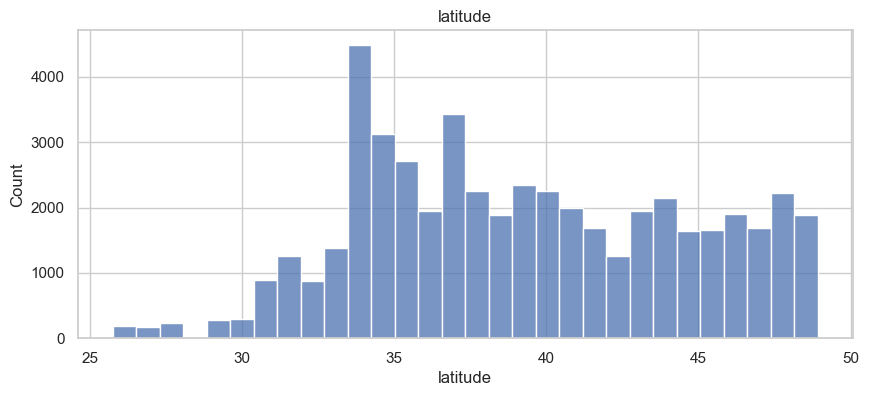

In [4]:
# Show top value counts for likely categorical columns if present
for c in ['state','cause','fire_type','year']:
    if c in df.columns:
        print('Top values for',c)
        print(df[c].value_counts().head(10))

# Numeric histograms
num_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10,4))
if len(num_cols)>0:
    sns.histplot(df[num_cols[0]].dropna(), bins=30)
    plt.title(num_cols[0])
    plt.show()
else:
    print('No numeric columns detected in sample')

**Insight:** Detected text columns (full file sample): `datetime`, `Wildfire`. Parse `datetime` to a datetime dtype for time-based analysis and treat `Wildfire` as event labels.

## 5. Save sample for later work

In [5]:
df.to_csv('Wildfire_Dataset_sample.csv', index=False)
print('Saved sample to Wildfire_Dataset_sample.csv')

Saved sample to Wildfire_Dataset_sample.csv


**Insight:** Saves the sampled wildfire data for more detailed geospatial analysis later (mapping, time series, aggregations).